In [1]:
import os
import imageio
import numpy as np
from sklearn.model_selection import  train_test_split
from matplotlib import pyplot as plt
import pandas as pd

# import keras
# from skimage.feature import hog
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
# from keras.layers import Conv2D, MaxPooling2D

In [2]:
##Loading the data into numpy arrays
data = []
labels = []

training_directory = './MyData/'
num_classes = len(os.listdir(training_directory))

for i in range(num_classes):
    training_directory = './MyData/' + str(i) + '/'
    for filename in os.listdir(training_directory):
        image = imageio.imread(training_directory + filename)

        #Populating arrays
        data.append(np.array(image))
        labels.append(i)
    print(str(i), end=' ')

## Force it to be np.array
data = np.array(data)
labels = np.array(labels)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

In [3]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

In [4]:
#might require installation of imblearn/delayed
#!pip install imblearn
#!pip install delayed

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', random_state=7)

In [5]:
nsamples, nx, ny, nz = x_train.shape
d2_dataset = x_train.reshape((nsamples,nx*ny*nz))

In [6]:
oversampled_trainX, oversampled_trainY = sm.fit_resample(d2_dataset, y_train)

In [7]:
print(x_train.shape)
print(y_train.shape)

(24359, 32, 32, 3)
(24359,)


In [8]:
print(oversampled_trainX.shape)
print(oversampled_trainY.shape)

(60372, 3072)
(60372,)


In [9]:
test = oversampled_trainX[0].reshape((32,32,3))

In [10]:
test.shape

(32, 32, 3)

In [11]:
oversampled_trainX[:3]

array([[115,  86,  76, ..., 255, 255, 255],
       [ 38,  39,  32, ...,  37,  33,  30],
       [ 28,  24,  25, ...,  18,  14,  14]], dtype=uint8)

In [12]:
shaped = []

for arr in oversampled_trainX:
    arr = arr.reshape(32,32,3)
    shaped.append(arr)

In [13]:
shaped = np.array(shaped)
shaped.shape

(60372, 32, 32, 3)

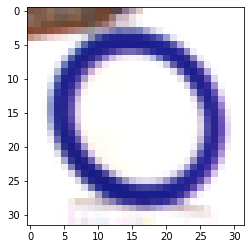

In [14]:
plt.figure()
plt.imshow(test)

In [15]:
def one_hot_to_label(one_hot):
     return np.argmax(one_hot)

In [16]:
classes = pd.read_csv('./labels.csv')
classes = np.array(classes)

In [17]:
classes

array([[0, 'Speed limit (20km/h)'],
       [1, 'Speed limit (30km/h)'],
       [2, 'Speed limit (50km/h)'],
       [3, 'Speed limit (60km/h)'],
       [4, 'Speed limit (70km/h)'],
       [5, 'Speed limit (80km/h)'],
       [6, 'End of speed limit (80km/h)'],
       [7, 'Speed limit (100km/h)'],
       [8, 'Speed limit (120km/h)'],
       [9, 'No passing'],
       [10, 'No passing for vechiles over 3.5 metric tons'],
       [11, 'Right-of-way at the next intersection'],
       [12, 'Priority road'],
       [13, 'Yield'],
       [14, 'Stop'],
       [15, 'No vechiles'],
       [16, 'Vechiles over 3.5 metric tons prohibited'],
       [17, 'No entry'],
       [18, 'General caution'],
       [19, 'Dangerous curve to the left'],
       [20, 'Dangerous curve to the right'],
       [21, 'Double curve'],
       [22, 'Bumpy road'],
       [23, 'Slippery road'],
       [24, 'Road narrows on the right'],
       [25, 'Road work'],
       [26, 'Traffic signals'],
       [27, 'Pedestrians'],
       [

In [18]:
oversampled_trainY[i+60000]

42

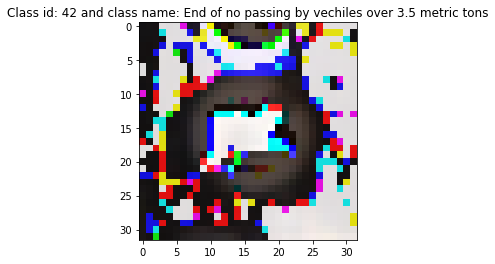

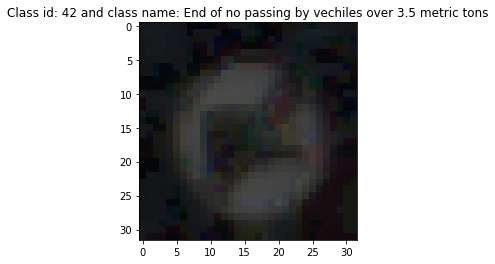

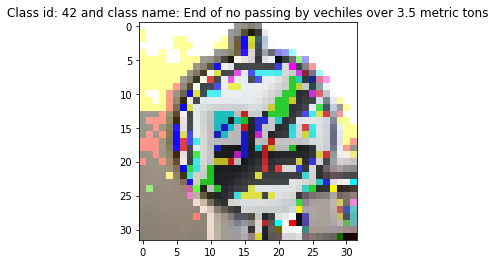

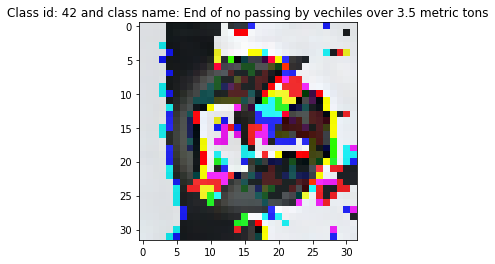

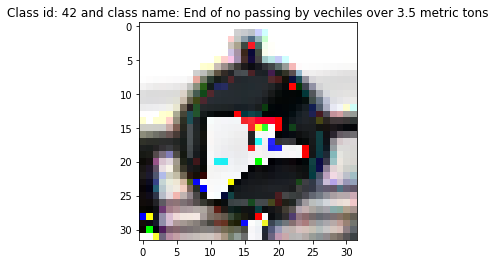

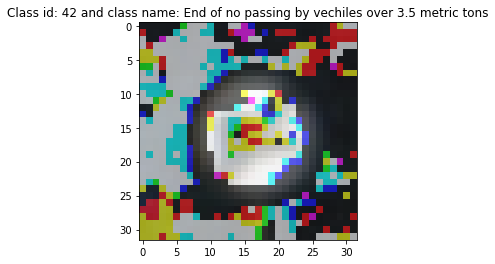

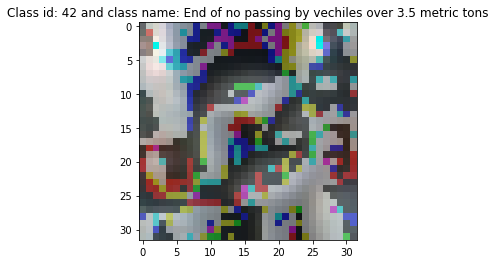

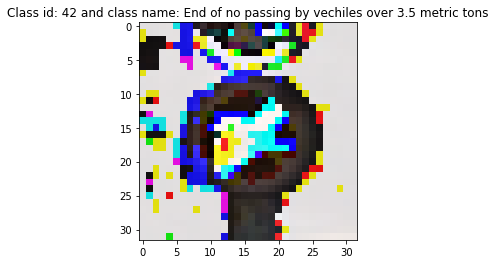

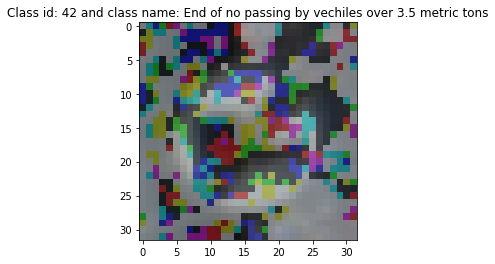

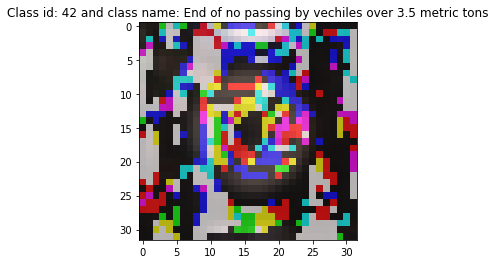

In [19]:
for i in range(10):
#     label = one_hot_to_label(oversampled_trainY[i+60000])
    label = oversampled_trainY[i+60000]
    plt.figure()
    plt.title("Class id: "+ str(label)+ " and class name: " + classes[label][1])
    plt.imshow(shaped[i+60000])